In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.externals import joblib

In [2]:
mov_df = pd.read_csv("Resources/cleaned_data.csv")


In [31]:
mov_df.loc[mov_df['imdb_score']<4]

,Unnamed: 0,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,binned_score
207,217,Color,Joel Schumacher,183.0,125.0,541.000000,409.00000,Vivica A. Fox,920.0,107285004.0,...,1018.0,English,USA,PG-13,125000000.0,1997.0,890.0,3.7,16719.617661,1
255,267,Color,Jan de Bont,79.0,121.0,101.000000,202.00000,Temuera Morrison,673.0,48068396.0,...,248.0,English,USA,PG-13,160000000.0,1997.0,368.0,3.7,894.000000,1
261,273,Color,Bo Welch,109.0,82.0,34.000000,434.00000,Kelly Preston,760.0,100446895.0,...,456.0,English,USA,PG,109000000.0,2003.0,743.0,3.8,946.000000,1
299,313,Color,Pitof,212.0,87.0,26.000000,566.00000,Christopher Heyerdahl,827.0,40198710.0,...,660.0,English,USA,PG-13,100000000.0,2004.0,825.0,3.3,16719.617661,1
305,319,Color,Lawrence Guterman,78.0,94.0,6.000000,227.00000,Traylor Howard,490.0,17010646.0,...,239.0,English,USA,PG,84000000.0,2005.0,294.0,2.2,881.000000,1
307,321,Color,Ron Underwood,66.0,95.0,31.000000,683.00000,Randy Quaid,3000.0,4411102.0,...,164.0,English,USA,PG-13,100000000.0,2002.0,695.0,3.8,416.000000,1
469,495,Color,Roger Christian,174.0,119.0,64.000000,41.00000,Michael Byrne,743.0,21471685.0,...,1308.0,English,USA,PG-13,44000000.0,2000.0,117.0,2.4,16719.617661,1
487,514,Color,Dennis Dugan,156.0,91.0,221.000000,553.00000,Adam Sandler,14000.0,74158157.0,...,264.0,English,USA,PG,79000000.0,2011.0,11000.0,3.4,16719.617661,1
588,620,Color,John McTiernan,151.0,98.0,323.000000,390.00000,Chris Klein,1000.0,18990542.0,...,289.0,English,USA,R,70000000.0,2002.0,841.0,3.0,584.000000,1
589,621,Color,Wych Kaosayananda,92.0,91.0,8.000000,298.00000,Sandrine Holt,349.0,14294842.0,...,277.0,English,USA,R,70000000.0,2002.0,324.0,3.6,391.000000,1


In [3]:
# Bin the score into 4 buckets: less than 4, 4~6, 6~8 and 8~10, which represents bad, OK, good and excellent respectively.
bins = [0,4,6,8,10]
labels = [1, 2, 3, 4]
mov_df['binned_score'] = pd.cut(mov_df['imdb_score'], bins=bins, labels=labels)
mov_df.head()

,Unnamed: 0,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,binned_score
0,0,Color,James Cameron,723.0,178.0,949.375628,855.0,Joel David Moore,1000.0,760505847.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000.000000,3
1,1,Color,Gore Verbinski,302.0,169.0,563.000000,1000.0,Orlando Bloom,40000.0,309404152.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,16719.617661,3
2,2,Color,Sam Mendes,602.0,148.0,949.375628,161.0,Rory Kinnear,11000.0,200074175.0,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000.000000,3
3,3,Color,Christopher Nolan,813.0,164.0,22000.000000,23000.0,Christian Bale,27000.0,448130642.0,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000.000000,4
4,5,Color,Andrew Stanton,462.0,132.0,475.000000,530.0,Samantha Morton,640.0,73058679.0,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000.000000,3


In [4]:
target = mov_df["binned_score"]
target_names = ["bad","Ok", "Good", "Excellent"]

In [5]:
data = pd.get_dummies(mov_df[["num_critic_for_reviews", "duration", "director_facebook_likes", "actor_3_facebook_likes",
               "actor_1_facebook_likes", "gross","genres", "num_voted_users", "cast_total_facebook_likes", 
               "facenumber_in_poster", "num_user_for_reviews", "content_rating", "budget", "actor_2_facebook_likes",
               "movie_facebook_likes"]])
feature_names = data.columns
data.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,genres_Mystery|Thriller,genres_Romance|Sci-Fi|Thriller,genres_Sci-Fi|Thriller,genres_Thriller,genres_Western,content_rating_G,content_rating_NC-17,content_rating_PG,content_rating_PG-13,content_rating_R
0,723.0,178.0,949.375628,855.0,1000.0,760505847.0,886204.0,4834.0,0.0,3054.0,...,0,0,0,0,0,0,0,0,1,0
1,302.0,169.0,563.000000,1000.0,40000.0,309404152.0,471220.0,48350.0,0.0,1238.0,...,0,0,0,0,0,0,0,0,1,0
2,602.0,148.0,949.375628,161.0,11000.0,200074175.0,275868.0,11700.0,1.0,994.0,...,0,0,0,0,0,0,0,0,1,0
3,813.0,164.0,22000.000000,23000.0,27000.0,448130642.0,1144337.0,106759.0,0.0,2701.0,...,0,0,0,0,0,0,0,0,1,0
4,462.0,132.0,475.000000,530.0,640.0,73058679.0,212204.0,1873.0,1.0,738.0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
data_new = pd.get_dummies(mov_df[[ "duration", "director_facebook_likes", "actor_3_facebook_likes",
               "actor_1_facebook_likes", "cast_total_facebook_likes", 
               "facenumber_in_poster", "content_rating", "budget", "actor_2_facebook_likes"]])
feature_names_new = data_new.columns
data_new.head()

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,facenumber_in_poster,budget,actor_2_facebook_likes,content_rating_G,content_rating_NC-17,content_rating_PG,content_rating_PG-13,content_rating_R
0,178.0,949.375628,855.0,1000.0,4834.0,0.0,237000000.0,936.0,0,0,0,1,0
1,169.0,563.000000,1000.0,40000.0,48350.0,0.0,300000000.0,5000.0,0,0,0,1,0
2,148.0,949.375628,161.0,11000.0,11700.0,1.0,245000000.0,393.0,0,0,0,1,0
3,164.0,22000.000000,23000.0,27000.0,106759.0,0.0,250000000.0,23000.0,0,0,0,1,0
4,132.0,475.000000,530.0,640.0,1873.0,1.0,263700000.0,632.0,0,0,0,1,0


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42, stratify=target)
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(data_new, target, random_state=42, stratify=target)

In [8]:
# Decision Tree
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6817226890756303

In [9]:
clf_new = tree.DecisionTreeClassifier()
clf_new = clf_new.fit(X_train_new, y_train_new)
clf_new.score(X_test_new, y_test_new)

0.5892857142857143

In [10]:
joblib.dump(clf_new, 'Models/decision_tree_simple.pkl')
joblib.dump(clf, 'Models/decision_tree_complex.pkl')

['Models/decision_tree_complex.pkl']

In [11]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

/Users/Shameetha/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.7615546218487395

In [12]:
rf_new = RandomForestClassifier(n_estimators=200)
rf_new = rf_new.fit(X_train_new, y_train_new)
rf_new.score(X_test_new, y_test_new)

0.6953781512605042

In [13]:
joblib.dump(rf, 'Models/rf_complex.pkl')
joblib.dump(rf_new, 'Models/rf_simple.pkl')

['Models/rf_simple.pkl']

In [14]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.09093413819472351, 'num_voted_users'),
 (0.07113591186256507, 'duration'),
 (0.06094731718027353, 'num_user_for_reviews'),
 (0.05959541779256933, 'budget'),
 (0.059524740859639574, 'movie_facebook_likes'),
 (0.05929264296882325, 'num_critic_for_reviews'),
 (0.05870531089036676, 'gross'),
 (0.05820386397476327, 'director_facebook_likes'),
 (0.05225605956159711, 'cast_total_facebook_likes'),
 (0.050326904245023535, 'actor_3_facebook_likes'),
 (0.04804491546531291, 'actor_1_facebook_likes'),
 (0.04608962747162045, 'actor_2_facebook_likes'),
 (0.026900375548364504, 'facenumber_in_poster'),
 (0.011218259716611265, 'content_rating_R'),
 (0.00979398553144509, 'content_rating_PG-13'),
 (0.0066726470985725185, 'content_rating_PG'),
 (0.006346892570032143, 'genres_Comedy'),
 (0.005600571041567703, 'genres_Comedy|Romance'),
 (0.005428064863178875, 'genres_Drama'),
 (0.00459420995698063, 'genres_Horror'),
 (0.0042268907317028846, 'genres_Comedy|Drama|Romance'),
 (0.004026750007467722, 'genres_

In [15]:
sorted(zip(rf_new.feature_importances_, feature_names_new), reverse=True)

[(0.15720803554462295, 'duration'),
 (0.1414389318264657, 'director_facebook_likes'),
 (0.13773444105036103, 'budget'),
 (0.1266332184802824, 'cast_total_facebook_likes'),
 (0.11883388842419772, 'actor_3_facebook_likes'),
 (0.11588641651927235, 'actor_2_facebook_likes'),
 (0.10516246291041037, 'actor_1_facebook_likes'),
 (0.051969679866432666, 'facenumber_in_poster'),
 (0.013937536599354016, 'content_rating_R'),
 (0.01348427513512119, 'content_rating_PG-13'),
 (0.010797206571826751, 'content_rating_PG'),
 (0.005563285356321268, 'content_rating_G'),
 (0.0013506217153315533, 'content_rating_NC-17')]

k: 1, Train/Test Score: 1.000/0.553
k: 3, Train/Test Score: 0.760/0.571
k: 5, Train/Test Score: 0.715/0.588
k: 7, Train/Test Score: 0.693/0.619
k: 9, Train/Test Score: 0.686/0.628
k: 11, Train/Test Score: 0.689/0.633
k: 13, Train/Test Score: 0.678/0.647
k: 15, Train/Test Score: 0.677/0.636
k: 17, Train/Test Score: 0.671/0.642
k: 19, Train/Test Score: 0.671/0.649


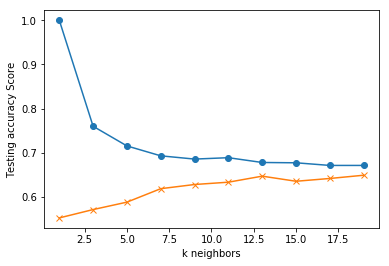

In [16]:
# K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [17]:
# Note that k: 9 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test, y_test))

k=9 Test Acc: 0.628


k: 1, Train/Test Score: 1.000/0.538
k: 3, Train/Test Score: 0.761/0.581
k: 5, Train/Test Score: 0.715/0.582
k: 7, Train/Test Score: 0.696/0.607
k: 9, Train/Test Score: 0.689/0.608
k: 11, Train/Test Score: 0.685/0.602
k: 13, Train/Test Score: 0.676/0.618
k: 15, Train/Test Score: 0.669/0.614
k: 17, Train/Test Score: 0.669/0.621
k: 19, Train/Test Score: 0.666/0.627


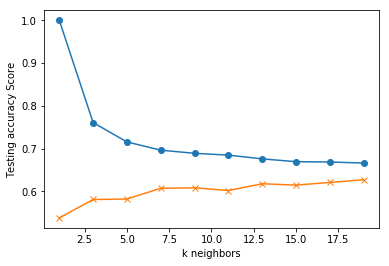

k=15 Test Acc: 0.614


In [18]:
# K Nearest Neighbors

# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores_new = []
test_scores_new = []
for k in range(1, 20, 2):
    knn_new = KNeighborsClassifier(n_neighbors=k)
    knn_new.fit(X_train_new, y_train_new)
    train_score_new = knn_new.score(X_train_new, y_train_new)
    test_score_new = knn_new.score(X_test_new, y_test_new)
    train_scores_new.append(train_score_new)
    test_scores_new.append(test_score_new)
    print(f"k: {k}, Train/Test Score: {train_score_new:.3f}/{test_score_new:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores_new, marker='o')
plt.plot(range(1, 20, 2), test_scores_new, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()
# Note that k: 9 seems to be the best choice for this dataset
knn_new = KNeighborsClassifier(n_neighbors=15)
knn_new.fit(X_train_new, y_train_new)
print('k=15 Test Acc: %.3f' % knn_new.score(X_test_new, y_test_new))

In [19]:
joblib.dump(knn, 'Models/knn_complex.pkl')
joblib.dump(knn_new, 'Models/knn_simple.pkl')

['Models/knn_simple.pkl']

In [20]:
# SVM
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC()
model.fit(X_train, y_train)

# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.659


In [21]:
# Calculate classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

             precision    recall  f1-score   support

        bad       0.00      0.00      0.00        24
         Ok       1.00      0.02      0.04       267
       Good       0.66      1.00      0.79       621
  Excellent       0.00      0.00      0.00        40

avg / total       0.71      0.66      0.53       952



/Users/Shameetha/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [22]:
# SVM
# Support vector machine linear classifier
from sklearn.svm import SVC 
model_new = SVC()
model_new.fit(X_train_new, y_train_new)

# Model Accuracy
print('Test Acc: %.3f' % model_new.score(X_test_new, y_test_new))
# Calculate classification report
predictions_new = model_new.predict(X_test_new)
print(classification_report(y_test_new, predictions_new,
                            target_names=target_names))

Test Acc: 0.658
             precision    recall  f1-score   support

        bad       0.00      0.00      0.00        24
         Ok       1.00      0.02      0.04       267
       Good       0.66      1.00      0.79       621
  Excellent       0.00      0.00      0.00        40

avg / total       0.71      0.66      0.53       952



/Users/Shameetha/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [23]:
joblib.dump(model, 'Models/svm_complex.pkl')
joblib.dump(model_new, 'Models/svm_simple.pkl')

['Models/svm_simple.pkl']

In [24]:
svm_model = joblib.load('Models/svm_complex.pkl')

In [25]:
predictions = svm_model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

             precision    recall  f1-score   support

        bad       0.00      0.00      0.00        24
         Ok       1.00      0.02      0.04       267
       Good       0.66      1.00      0.79       621
  Excellent       0.00      0.00      0.00        40

avg / total       0.71      0.66      0.53       952



/Users/Shameetha/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [26]:
svm_model_new = joblib.load('Models/svm_simple.pkl')

In [27]:
predictions_new = svm_model_new.predict(X_test_new)
print(classification_report(y_test_new, predictions_new,
                            target_names=target_names))

             precision    recall  f1-score   support

        bad       0.00      0.00      0.00        24
         Ok       1.00      0.02      0.04       267
       Good       0.66      1.00      0.79       621
  Excellent       0.00      0.00      0.00        40

avg / total       0.71      0.66      0.53       952



/Users/Shameetha/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [29]:
predictions_new = rf_new.predict(X_test_new)
print(classification_report(y_test_new, predictions_new,
                            target_names=target_names))

             precision    recall  f1-score   support

        bad       0.00      0.00      0.00        24
         Ok       0.57      0.38      0.46       267
       Good       0.72      0.90      0.80       621
  Excellent       1.00      0.07      0.14        40

avg / total       0.67      0.70      0.66       952



/Users/Shameetha/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
